## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 64
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9949186	total: 58ms	remaining: 57.9s
1:	learn: 0.9762634	total: 58.9ms	remaining: 29.4s
2:	learn: 0.9547734	total: 59.8ms	remaining: 19.9s
3:	learn: 0.9373292	total: 60.6ms	remaining: 15.1s
4:	learn: 0.9203446	total: 61.5ms	remaining: 12.2s
5:	learn: 0.9028768	total: 62.5ms	remaining: 10.3s
6:	learn: 0.8858076	total: 63.5ms	remaining: 9.01s
7:	learn: 0.8693855	total: 64.4ms	remaining: 7.99s
8:	learn: 0.8540958	total: 65.3ms	remaining: 7.19s
9:	learn: 0.8385520	total: 66.4ms	remaining: 6.58s
10:	learn: 0.8237287	total: 67.5ms	remaining: 6.07s
11:	learn: 0.8099602	total: 68.5ms	remaining: 5.64s
12:	learn: 0.7944095	total: 69.5ms	remaining: 5.27s
13:	learn: 0.7793890	total: 70.5ms	remaining: 4.96s
14:	learn: 0.7662694	total: 71.4ms	remaining: 4.69s
15:	learn: 0.7528459	total: 72.6ms	remaining: 4.47s


16:	learn: 0.7421068	total: 73.9ms	remaining: 4.27s
17:	learn: 0.7287417	total: 75.1ms	remaining: 4.1s
18:	learn: 0.7162173	total: 76.1ms	remaining: 3.93s
19:	learn: 0.7036428	total: 77.1ms	remaining: 3.77s
20:	learn: 0.6909012	total: 78ms	remaining: 3.64s
21:	learn: 0.6796563	total: 79ms	remaining: 3.51s
22:	learn: 0.6695558	total: 79.9ms	remaining: 3.4s
23:	learn: 0.6599293	total: 80.9ms	remaining: 3.29s
24:	learn: 0.6502001	total: 81.7ms	remaining: 3.19s
25:	learn: 0.6395187	total: 82.6ms	remaining: 3.1s
26:	learn: 0.6292322	total: 83.4ms	remaining: 3.01s
27:	learn: 0.6198654	total: 84.1ms	remaining: 2.92s
28:	learn: 0.6115983	total: 84.9ms	remaining: 2.84s
29:	learn: 0.6021273	total: 85.7ms	remaining: 2.77s
30:	learn: 0.5941511	total: 86.5ms	remaining: 2.7s
31:	learn: 0.5849842	total: 87.4ms	remaining: 2.64s
32:	learn: 0.5775757	total: 88.2ms	remaining: 2.58s
33:	learn: 0.5705007	total: 89ms	remaining: 2.53s
34:	learn: 0.5633943	total: 89.9ms	remaining: 2.48s
35:	learn: 0.5560822	t

114:	learn: 0.2962464	total: 156ms	remaining: 1.2s
115:	learn: 0.2948692	total: 157ms	remaining: 1.2s
116:	learn: 0.2932894	total: 158ms	remaining: 1.19s
117:	learn: 0.2917771	total: 158ms	remaining: 1.18s
118:	learn: 0.2906045	total: 159ms	remaining: 1.18s
119:	learn: 0.2897851	total: 160ms	remaining: 1.17s
120:	learn: 0.2885916	total: 162ms	remaining: 1.17s
121:	learn: 0.2875522	total: 162ms	remaining: 1.17s
122:	learn: 0.2862505	total: 163ms	remaining: 1.16s
123:	learn: 0.2849642	total: 164ms	remaining: 1.16s
124:	learn: 0.2839067	total: 165ms	remaining: 1.15s
125:	learn: 0.2824418	total: 165ms	remaining: 1.15s
126:	learn: 0.2815180	total: 166ms	remaining: 1.14s
127:	learn: 0.2807670	total: 167ms	remaining: 1.14s
128:	learn: 0.2796800	total: 168ms	remaining: 1.13s
129:	learn: 0.2786665	total: 169ms	remaining: 1.13s
130:	learn: 0.2778135	total: 169ms	remaining: 1.12s
131:	learn: 0.2767821	total: 170ms	remaining: 1.12s
132:	learn: 0.2760758	total: 171ms	remaining: 1.11s
133:	learn: 0.

236:	learn: 0.2107587	total: 264ms	remaining: 850ms
237:	learn: 0.2102961	total: 265ms	remaining: 848ms
238:	learn: 0.2098082	total: 266ms	remaining: 846ms
239:	learn: 0.2093422	total: 267ms	remaining: 844ms
240:	learn: 0.2087542	total: 267ms	remaining: 842ms
241:	learn: 0.2085168	total: 268ms	remaining: 839ms
242:	learn: 0.2082256	total: 269ms	remaining: 837ms
243:	learn: 0.2080457	total: 269ms	remaining: 835ms
244:	learn: 0.2076209	total: 270ms	remaining: 832ms
245:	learn: 0.2071076	total: 271ms	remaining: 830ms
246:	learn: 0.2067488	total: 272ms	remaining: 828ms
247:	learn: 0.2066275	total: 272ms	remaining: 826ms
248:	learn: 0.2063484	total: 273ms	remaining: 823ms
249:	learn: 0.2059499	total: 274ms	remaining: 821ms
250:	learn: 0.2055653	total: 274ms	remaining: 819ms
251:	learn: 0.2050828	total: 275ms	remaining: 817ms
252:	learn: 0.2046914	total: 276ms	remaining: 814ms
253:	learn: 0.2041973	total: 276ms	remaining: 812ms
254:	learn: 0.2038178	total: 277ms	remaining: 810ms
255:	learn: 

332:	learn: 0.1739982	total: 346ms	remaining: 693ms
333:	learn: 0.1739365	total: 347ms	remaining: 691ms
334:	learn: 0.1734588	total: 348ms	remaining: 690ms
335:	learn: 0.1730683	total: 348ms	remaining: 688ms
336:	learn: 0.1727027	total: 349ms	remaining: 687ms
337:	learn: 0.1721496	total: 350ms	remaining: 686ms
338:	learn: 0.1718158	total: 351ms	remaining: 684ms
339:	learn: 0.1711816	total: 352ms	remaining: 683ms
340:	learn: 0.1707207	total: 353ms	remaining: 681ms
341:	learn: 0.1706517	total: 353ms	remaining: 680ms
342:	learn: 0.1701756	total: 354ms	remaining: 678ms
343:	learn: 0.1701163	total: 355ms	remaining: 677ms
344:	learn: 0.1696451	total: 356ms	remaining: 676ms
345:	learn: 0.1691698	total: 357ms	remaining: 675ms
346:	learn: 0.1687357	total: 358ms	remaining: 674ms
347:	learn: 0.1682639	total: 359ms	remaining: 672ms
348:	learn: 0.1679298	total: 360ms	remaining: 671ms
349:	learn: 0.1675419	total: 361ms	remaining: 670ms
350:	learn: 0.1673587	total: 361ms	remaining: 668ms
351:	learn: 

459:	learn: 0.1334766	total: 454ms	remaining: 533ms
460:	learn: 0.1332451	total: 455ms	remaining: 532ms
461:	learn: 0.1331073	total: 456ms	remaining: 531ms
462:	learn: 0.1327796	total: 457ms	remaining: 530ms
463:	learn: 0.1324418	total: 458ms	remaining: 529ms
464:	learn: 0.1321268	total: 458ms	remaining: 528ms
465:	learn: 0.1319683	total: 459ms	remaining: 526ms
466:	learn: 0.1318251	total: 460ms	remaining: 525ms
467:	learn: 0.1317647	total: 461ms	remaining: 524ms
468:	learn: 0.1315845	total: 462ms	remaining: 523ms
469:	learn: 0.1313279	total: 463ms	remaining: 522ms
470:	learn: 0.1311268	total: 463ms	remaining: 520ms
471:	learn: 0.1309063	total: 464ms	remaining: 519ms
472:	learn: 0.1305918	total: 465ms	remaining: 518ms
473:	learn: 0.1302703	total: 466ms	remaining: 517ms
474:	learn: 0.1299833	total: 467ms	remaining: 516ms
475:	learn: 0.1299215	total: 467ms	remaining: 515ms
476:	learn: 0.1298510	total: 468ms	remaining: 513ms
477:	learn: 0.1295985	total: 469ms	remaining: 512ms
478:	learn: 

539:	learn: 0.1170512	total: 520ms	remaining: 443ms
540:	learn: 0.1167800	total: 521ms	remaining: 442ms
541:	learn: 0.1165895	total: 522ms	remaining: 441ms
542:	learn: 0.1163333	total: 523ms	remaining: 440ms
543:	learn: 0.1160714	total: 523ms	remaining: 439ms
544:	learn: 0.1158233	total: 524ms	remaining: 438ms
545:	learn: 0.1155630	total: 525ms	remaining: 437ms
546:	learn: 0.1152751	total: 526ms	remaining: 436ms
547:	learn: 0.1149201	total: 527ms	remaining: 434ms
548:	learn: 0.1148473	total: 528ms	remaining: 433ms
549:	learn: 0.1147549	total: 528ms	remaining: 432ms
550:	learn: 0.1146397	total: 529ms	remaining: 431ms
551:	learn: 0.1144617	total: 530ms	remaining: 430ms
552:	learn: 0.1141444	total: 531ms	remaining: 429ms
553:	learn: 0.1138283	total: 532ms	remaining: 428ms
554:	learn: 0.1137636	total: 533ms	remaining: 427ms
555:	learn: 0.1135607	total: 534ms	remaining: 426ms
556:	learn: 0.1134362	total: 534ms	remaining: 425ms
557:	learn: 0.1132873	total: 535ms	remaining: 424ms
558:	learn: 

663:	learn: 0.0958310	total: 628ms	remaining: 318ms
664:	learn: 0.0957904	total: 629ms	remaining: 317ms
665:	learn: 0.0956708	total: 630ms	remaining: 316ms
666:	learn: 0.0956336	total: 631ms	remaining: 315ms
667:	learn: 0.0954625	total: 632ms	remaining: 314ms
668:	learn: 0.0953046	total: 633ms	remaining: 313ms
669:	learn: 0.0952408	total: 634ms	remaining: 312ms
670:	learn: 0.0950443	total: 635ms	remaining: 311ms
671:	learn: 0.0948688	total: 635ms	remaining: 310ms
672:	learn: 0.0946636	total: 636ms	remaining: 309ms
673:	learn: 0.0945141	total: 637ms	remaining: 308ms
674:	learn: 0.0943322	total: 638ms	remaining: 307ms
675:	learn: 0.0941785	total: 639ms	remaining: 306ms
676:	learn: 0.0941435	total: 639ms	remaining: 305ms
677:	learn: 0.0939554	total: 640ms	remaining: 304ms
678:	learn: 0.0937660	total: 641ms	remaining: 303ms
679:	learn: 0.0936607	total: 642ms	remaining: 302ms
680:	learn: 0.0935044	total: 642ms	remaining: 301ms
681:	learn: 0.0933308	total: 643ms	remaining: 300ms
682:	learn: 

762:	learn: 0.0836778	total: 710ms	remaining: 221ms
763:	learn: 0.0836577	total: 711ms	remaining: 220ms
764:	learn: 0.0835462	total: 712ms	remaining: 219ms
765:	learn: 0.0833935	total: 713ms	remaining: 218ms
766:	learn: 0.0832766	total: 714ms	remaining: 217ms
767:	learn: 0.0830905	total: 715ms	remaining: 216ms
768:	learn: 0.0830677	total: 715ms	remaining: 215ms
769:	learn: 0.0828932	total: 716ms	remaining: 214ms
770:	learn: 0.0827965	total: 717ms	remaining: 213ms
771:	learn: 0.0826013	total: 718ms	remaining: 212ms
772:	learn: 0.0824042	total: 719ms	remaining: 211ms
773:	learn: 0.0822753	total: 719ms	remaining: 210ms
774:	learn: 0.0820802	total: 720ms	remaining: 209ms
775:	learn: 0.0819696	total: 721ms	remaining: 208ms
776:	learn: 0.0819048	total: 722ms	remaining: 207ms
777:	learn: 0.0818070	total: 723ms	remaining: 206ms
778:	learn: 0.0817635	total: 724ms	remaining: 205ms
779:	learn: 0.0816395	total: 724ms	remaining: 204ms
780:	learn: 0.0815083	total: 725ms	remaining: 203ms
781:	learn: 

892:	learn: 0.0709869	total: 819ms	remaining: 98.1ms
893:	learn: 0.0708938	total: 820ms	remaining: 97.2ms
894:	learn: 0.0708779	total: 821ms	remaining: 96.3ms
895:	learn: 0.0707165	total: 821ms	remaining: 95.4ms
896:	learn: 0.0705479	total: 822ms	remaining: 94.4ms
897:	learn: 0.0704731	total: 823ms	remaining: 93.5ms
898:	learn: 0.0703925	total: 824ms	remaining: 92.6ms
899:	learn: 0.0702945	total: 825ms	remaining: 91.6ms
900:	learn: 0.0702879	total: 826ms	remaining: 90.7ms
901:	learn: 0.0701954	total: 827ms	remaining: 89.8ms
902:	learn: 0.0701302	total: 828ms	remaining: 88.9ms
903:	learn: 0.0700291	total: 829ms	remaining: 88ms
904:	learn: 0.0699388	total: 829ms	remaining: 87.1ms
905:	learn: 0.0698086	total: 830ms	remaining: 86.1ms
906:	learn: 0.0697107	total: 831ms	remaining: 85.2ms
907:	learn: 0.0696530	total: 832ms	remaining: 84.3ms
908:	learn: 0.0696072	total: 833ms	remaining: 83.4ms
909:	learn: 0.0694709	total: 834ms	remaining: 82.4ms
910:	learn: 0.0692552	total: 834ms	remaining: 81

990:	learn: 0.0628176	total: 901ms	remaining: 8.18ms
991:	learn: 0.0627893	total: 902ms	remaining: 7.27ms
992:	learn: 0.0626805	total: 903ms	remaining: 6.36ms
993:	learn: 0.0626703	total: 904ms	remaining: 5.45ms
994:	learn: 0.0625484	total: 904ms	remaining: 4.54ms
995:	learn: 0.0625427	total: 905ms	remaining: 3.63ms
996:	learn: 0.0624920	total: 906ms	remaining: 2.73ms
997:	learn: 0.0624158	total: 907ms	remaining: 1.82ms
998:	learn: 0.0623273	total: 909ms	remaining: 909us
999:	learn: 0.0622601	total: 910ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

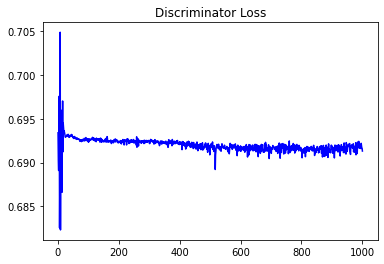

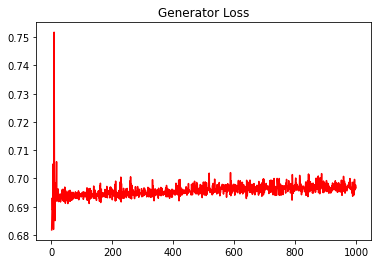

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,0,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.11206568517315693


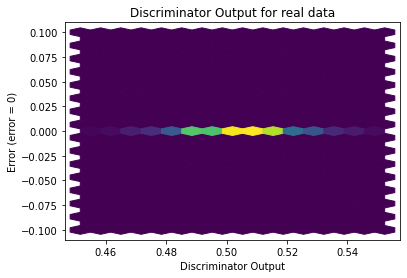

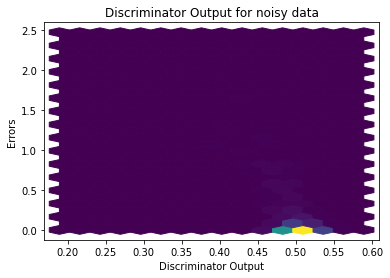

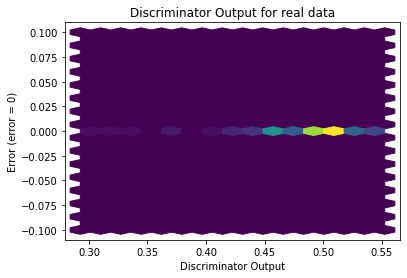

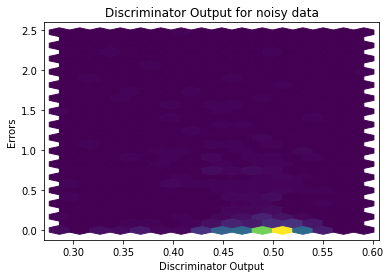

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


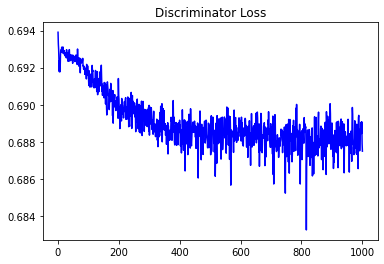

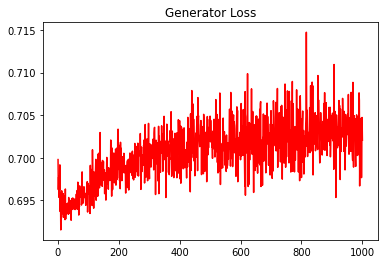

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,0,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,0,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1728389625063143


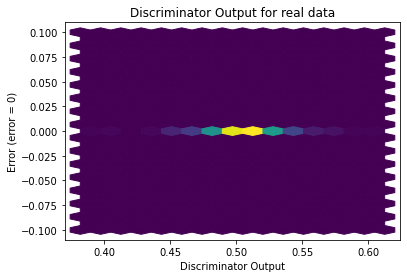

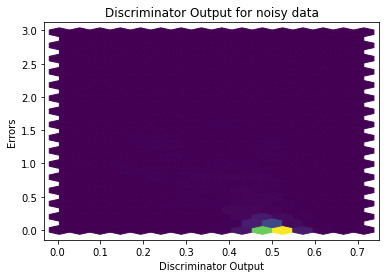

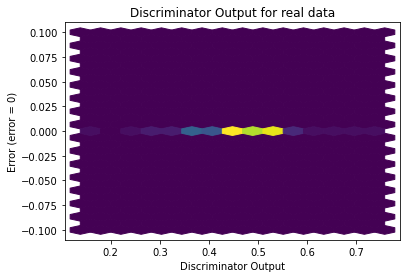

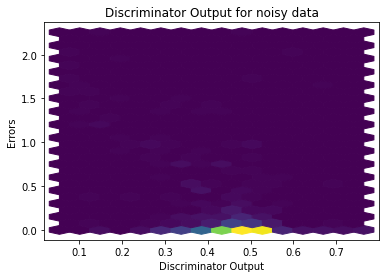

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.6073]], requires_grad=True)
